## An√°lisis Comercial de clientes

In [2]:
# 1. Librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import openpyxl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
from io import StringIO

# Configuraci√≥n visual
"""pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)"""


'pd.set_option(\'display.max_columns\', None)\nsns.set(style="whitegrid", palette="muted", font_scale=1.1)'

In [ ]:
# Rango de Fechas

# El uso de la central "Anura" arranca el 26-05-2021
# El comienzo de Zoho Desk es 

"""fecha_inicio = "2023-01-01 00:01"
fecha_fin = "2024-12-31 23:59""""

# An√°lisis de Tickets
    - Tomado de Zoho Desk \Informes Christian\1-Cantidad de Ticket por Rango Fecha

In [3]:
# Tomamos los datos del archivo *.csv almacenado de manera local 
# Este archivo *.csv tiene todos los tickets de Clientes
df_crudo_Tickets = pd.read_csv('ds/Cantidad de Ticket por Rango Fecha_01012021_31082025.csv', sep=',' , encoding='utf-8')

# ---- An√°lisis Exploratorio de Datos (AED) ----
new_header = df_crudo_Tickets.iloc[3] # Tomar la fila 3 como "cabecera".

# Eliminar las primeras 4 filas y luego la fila que acabamos de usar como encabezado para que los datos comiencen desde la fila 4
df_tickets = df_crudo_Tickets[4:] # Selecciona todas las filas desde el √≠ndice 4 en adelante

# Asignar los nuevos nombres de columna
df_tickets.columns = new_header
df_tickets = df_tickets.reset_index(drop=True) # Reniciamos el √≠ndice

# Especifica el formato de acuerdo a tu caso
formato = '%d %b %Y %I:%M %p'  # dd: d√≠a, MMM: mes abreviado, yyyy: a√±o, HH: horas en formato 12h, MM: minutos, AM/PM
# Separamos fecha y hora en campos diferentes tomando los datos del campo "Hora de creaci√≥n (Ticket)"
df_tickets['Fecha_creacion'] = pd.to_datetime(df_tickets['Hora de creaci√≥n (Ticket)'], format=formato).dt.date
df_tickets['Hora_creacion'] = pd.to_datetime(df_tickets['Hora de creaci√≥n (Ticket)'], format=formato).dt.time

#Eliminamos la columna "Hora de creaci√≥n (Ticket)" ya que ahora tenemos los datos separados en dos columnas diferentes
df_tickets = df_tickets.drop(columns=['Hora de creaci√≥n (Ticket)'])

# Encontramos casos de tickets que NO tienen cargado el cliente. Se usan para esos casos los valores "-" y "--" vamos a reemplazarlos por "NN"
df_tickets["Nombre de Cuenta"] = df_tickets["Nombre de Cuenta"].replace(["-", "--"], "NN")



C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7844\2730946549.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crudo_Tickets = pd.read_csv('ds/Cantidad de Ticket por Rango Fecha_01012021_31082025.csv', sep=',' , encoding='utf-8')


In [ ]:
"""df_tickets.head(-2)"""

3      ID de Ticket     Nombre de Cuenta  \
0              1000              HODASAN   
1             10001    ANGACO MATERIALES   
2             10002     ARCO MAQUINARIAS   
3             10003  ANDERSEN MATERIALES   
4             10004                FUGAS   
...             ...                  ...   
102549       104103                Lampe   
102550       104104                Lampe   
102551       104105         LOGBELTS SRL   
102552       104106              BOURLOT   
102553       104107          INTER PARTS   

3                                                  Asunto  \
0                                        Problema con CAE   
1       CONSULTA VISUALIZACION PRODUCTOS PENDIENTES DE...   
2                                           Buenas tardes   
3                         RE: PREGUNTAS DEL SISTEMA NUEVO   
4                                       Script de bloqueo   
...                                                   ...   
102549                                       Chat s√°bados   
102550  Solicita archivos xls par aimportar los codigo...   
102551  Error al solicitar cae "el numero de  comproba...   
102552                   Consulta por anulaci√≥n de remito   
102553      No se actualiza el archivo de ML en produteka   

3      Descripci√≥n del error  \
0                          -   
1                          -   
2                          -   
3                          -   
4                          -   
...                      ...   
102549                     -   
102550                     -   
102551                     -   
102552                     -   
102553                     -   

3                                      Ticket Descripci√≥n Estado (Ticket)  \
0                                                     NaN         Cerrado   
1                                                     NaN       No aplica   
2                                                     NaN       No aplica   
3                                                     NaN         Cerrado   
4       Buen dia, actualmente el punto de venta 5 y 10...       No aplica   
...                                                   ...             ...   
102549                                       Chat s√°bados         Cerrado   
102550  Solicita archivos xls par a importar los c√≥dig...         Cerrado   
102551  Error al solicitar cae el numero de comprobant...         Cerrado   
102552                                                NaN         Cerrado   
102553      No se actualiza el archivo de ML en produteka         Cerrado   

3      Fecha de cierre  Canal Clasificaciones Motivo de la urgencia  \
0                    -   Chat        Consulta                     -   
1                    -   Chat        Consulta                     -   
2                    -   Chat        Consulta                     -   
3                    -  Email        Consulta                     -   
4                    -    Web        Consulta                     -   
...                ...    ...             ...                   ...   
102549     30 Aug 2025   Chat        Consulta                     -   
102550     01 Sep 2025    Web        Consulta                     -   
102551     30 Aug 2025  Phone        Consulta                     -   
102552     30 Aug 2025  Phone        Consulta                     -   
102553     30 Aug 2025  Phone        Consulta                     -   

3      Propietario de Ticket               M√≥dulo Fecha_creacion Hora_creacion  
0       Sergio de los Santos                    -     2021-03-26      13:07:00  
1        Juan Pablo  Cabrera                    -     2021-08-03      15:33:00  
2        Juan Pablo  Cabrera                    -     2021-08-03      15:34:00  
3             Eliana Barreto                    -     2021-08-03      15:43:00  
4        Juan Pablo  Cabrera                    -     2021-08-03      15:46:00  
...                      ...                  ...            ...           ...  
1

# Qu√© rango de fechas estamos trabajando en el DS principal?
- Primer ticket
- √öltimo ticket

In [5]:
# Aseguramos que la fecha sea tipo datetime
df_tickets["Fecha_creacion"] = pd.to_datetime(df_tickets["Fecha_creacion"], errors="coerce")

# Ordenamos por fecha y hora
df_tickets = df_tickets.sort_values(by=["Fecha_creacion", "Hora_creacion"])

# Primer ticket
primer_ticket = df_tickets.iloc[0][["ID de Ticket", "Nombre de Cuenta", "Fecha_creacion", "Hora_creacion"]]

# √öltimo ticket
ultimo_ticket = df_tickets.iloc[-1][["ID de Ticket", "Nombre de Cuenta", "Fecha_creacion", "Hora_creacion"]]

# Armamos tabla final
tickets_resumen = pd.DataFrame([primer_ticket, ultimo_ticket])
tickets_resumen["Tipo"] = ["Primer Ticket", "√öltimo Ticket"]

# Mostramos la tabla con el resumen de los tickets
tickets_resumen

3      ID de Ticket Nombre de Cuenta Fecha_creacion Hora_creacion  \
7866            173        LUBRITODO     2021-01-29      19:20:00   
102555       104109         GRALIFER     2025-08-31      20:21:00   

3                Tipo  
7866    Primer Ticket  
102555  √öltimo Ticket

# Dividir DS de tickets para an√°lisis en semestres
- S1 (1er. semestre del a√±o ) 
- S2 (2do. semestre del a√±o )

In [ ]:
# Crear columna de semestre
df_tickets["Semestre"] = df_tickets["Fecha_creacion"].apply(
    lambda x: f"S{1 if x.month <= 6 else 2}_{x.year}" if pd.notnull(x) else None
)

# Generar datasets separados como variables din√°micas
globals().update({
    f"df_tickets_{semestre}": df.copy()
    for semestre, df in df_tickets.groupby("Semestre")
})

# Chequear algunas variables creadas
print(df_tickets_S1_2021.head())
print(df_tickets_S2_2021.head())


3    ID de Ticket               Nombre de Cuenta  \
7866          173                      LUBRITODO   
7977          174  FB ELECTRICIDAD DEL AUTOMOTOR   
8088          175                     HIPERPLACA   
8199          176                TALLERES ALSINA   
8308          177                  FERRETERIA 24   

3                                                Asunto Descripci√≥n del error  \
7866   Agregar script de control que muestre la suma...                     -   
7977  Cambiar nombre de columnas sobre precios en pa...                     -   
8088   Autorizaci√≥n de comprobantes - Descuentos en ...                     -   
8199   Agregar par√°metro de b√∫squeda "c√≥digo externo...                     -   
8308               Evaluaci√≥n de confecci√≥n reportes A5                     -   

3                                    Ticket Descripci√≥n Estado (Ticket)  \
7866  Tema: agregar un script de control de manera q...         Cerrado   
7977  Tema: en la pantalla de listas de pr

In [ ]:
# EVALUAR SACAR ESTA PARTE porque abajo se hace lo mismo y se incorpora el TOTAL
# ??????????????????????????????????????????????????????????
# ??????????????????????????????????????????????????????????
# ??????????????????????????????????????????????????????????

# Cantidad de Tickets por cliente dividimos por A√±o
# ----------------------------------------------------------

# Asegurarnos que la columna de fecha es datetime
df_tickets["Fecha_creacion"] = pd.to_datetime(df_tickets["Fecha_creacion"], errors="coerce")

# Extraer el a√±o
df_tickets["A√±o"] = df_tickets["Fecha_creacion"].dt.year

# Agrupar por cliente y a√±o
tickets_por_anio = (
    df_tickets.groupby(["Nombre de Cuenta", "A√±o"])["ID de Ticket"]
    .count()
    .reset_index(name="Cantidad_Tickets")
)

# Pivot para que los a√±os aparezcan como columnas
tabla_final_x_anio = tickets_por_anio.pivot_table(
    index="Nombre de Cuenta",
    columns="A√±o",
    values="Cantidad_Tickets",
    fill_value=0
).reset_index()

# Renombrar columnas para que se vean m√°s claras
tabla_final_x_anio = tabla_final_x_anio.rename_axis(None, axis=1)
tabla_final_x_anio = tabla_final_x_anio.rename(columns={col: f"Cantidad_Tickets {col}" for col in tabla_final_x_anio.columns if isinstance(col, int)})

"""
# Exportar a Excel
tabla_final_x_anio.to_excel("tickets_por_cliente_anio.xlsx", index=False)

print("‚úÖ Archivo 'tickets_por_cliente_anio.xlsx' generado con √©xito.")
"""

'\n# Exportar a Excel\ntabla_final_x_anio.to_excel("tickets_por_cliente_anio.xlsx", index=False)\n\nprint("‚úÖ Archivo \'tickets_por_cliente_anio.xlsx\' generado con √©xito.")\n'

In [17]:
# Cantidad de Tickets por cliente dividimos por A√±o + TOTAL
# ----------------------------------------------------------

# Asegurarnos que la columna de fecha es datetime
df_tickets["Fecha_creacion"] = pd.to_datetime(df_tickets["Fecha_creacion"], errors="coerce")

# Extraer el a√±o
df_tickets["A√±o"] = df_tickets["Fecha_creacion"].dt.year

# Agrupar por cliente y a√±o
tickets_por_anio = (
    df_tickets.groupby(["Nombre de Cuenta", "A√±o"])["ID de Ticket"]
    .count()
    .reset_index(name="Cantidad_Tickets")
)

# Pivot para que los a√±os aparezcan como columnas
tabla_final = tickets_por_anio.pivot_table(
    index="Nombre de Cuenta",
    columns="A√±o",
    values="Cantidad_Tickets",
    fill_value=0
).reset_index()

# Renombrar columnas para que se vean m√°s claras
tabla_final = tabla_final.rename_axis(None, axis=1)
tabla_final = tabla_final.rename(columns={col: f"Cantidad_Tickets {col}" for col in tabla_final.columns if isinstance(col, int)})

# ‚ûï Agregar columna TOTAL_Tickets (suma de todas las columnas de a√±os)
cols_anios = [c for c in tabla_final.columns if "Cantidad_Tickets" in c and c != "Nombre de Cuenta"]
tabla_final["TOTAL_Tickets"] = tabla_final[cols_anios].sum(axis=1)

"""
# Exportar a Excel
tabla_final.to_excel("tickets_por_cliente_anio.xlsx", index=False)

print("‚úÖ Archivo 'tickets_por_cliente_anio.xlsx' generado con √©xito.")
"""


'\n# Exportar a Excel\ntabla_final.to_excel("tickets_por_cliente_anio.xlsx", index=False)\n\nprint("‚úÖ Archivo \'tickets_por_cliente_anio.xlsx\' generado con √©xito.")\n'

# CRM
- Fecha inicio Paljet
- Licencias
- Productos

In [18]:
# An√°lisis de Productos - M√≥dulos - Licencias
df_crudo_CRM = pd.read_csv('ds/Clientes-Modulos-Productos-Licencias.csv', sep=',' , encoding='utf-8')

#----- An√°lisis Exploratorio de Datos -------------------
new_header_CRM = df_crudo_CRM.iloc[3] # Tomar la fila 3 como "cabecera".

# Eliminar las primeras 4 filas y luego la fila que acabamos de usar como encabezado para que los datos comiencen desde la fila 4
df_CRM = df_crudo_CRM[4:] # Selecciona todas las filas desde el √≠ndice 4 en adelante


In [26]:
df_CRM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 4 to 1208
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Nombre de Cuenta              1205 non-null   object 
 1   Tipo de Cuenta                1205 non-null   object 
 2   Nombre de Modulo Activo       1205 non-null   object 
 3   Producto                      1199 non-null   object 
 4   Cantidad de PC                1205 non-null   int64  
 5   Cantidad de tel√©fonos Mobile  224 non-null    float64
 6   Cantidad de Usuarios          64 non-null     float64
 7   Calificaci√≥n                  1205 non-null   object 
 8   Fecha de  Venta               1202 non-null   object 
 9   Fecha de Alta                 1192 non-null   object 
 10  Fecha de baja Paljet          2 non-null      object 
 11  Fecha de Inicio PalJetERP     1172 non-null   object 
 12  Estado                        488 non-null    object 
dtypes

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7844\1710531180.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CRM[col] = pd.to_datetime(df_CRM[col], errors="coerce", dayfirst=True)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7844\1710531180.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CRM[col] = pd.to_datetime(df_CRM[col], errors="coerce", dayfirst=True)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7844\1710531180.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

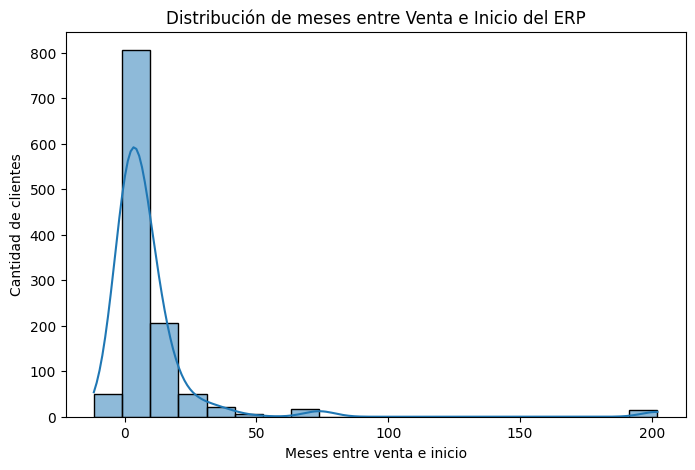

ValueError: Could not interpret value `Fecha de Venta` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertir las fechas
fechas_cols = ["Fecha de  Venta", "Fecha de Inicio PalJetERP"]
for col in fechas_cols:
    df_CRM[col] = pd.to_datetime(df_CRM[col], errors="coerce", dayfirst=True)

# Calcular diferencia en d√≠as
df_CRM["Dias_Venta_a_Inicio"] = (df_CRM["Fecha de Inicio PalJetERP"] - df_CRM["Fecha de  Venta"]).dt.days

# Pasar a meses (aprox 30 d√≠as)
df_CRM["Meses_Venta_a_Inicio"] = df_CRM["Dias_Venta_a_Inicio"] / 30

# Filtrar v√°lidos
df_validos = df_CRM.dropna(subset=["Meses_Venta_a_Inicio"])

# --- Histograma ---
plt.figure(figsize=(8,5))
sns.histplot(df_validos["Meses_Venta_a_Inicio"], bins=20, kde=True)
plt.title("Distribuci√≥n de meses entre Venta e Inicio del ERP")
plt.xlabel("Meses entre venta e inicio")
plt.ylabel("Cantidad de clientes")
plt.show()

# --- Scatterplot ---
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_validos,
    x="Fecha de Venta",
    y="Meses_Venta_a_Inicio",
    hue="Nombre de Cuenta"
)
plt.title("Tiempo de implementaci√≥n por cliente (en meses)")
plt.xlabel("Fecha de Venta")
plt.ylabel("Meses hasta inicio")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [20]:
# Agrupar por cliente y consolidar
resumen_x_cliente = (
    df_CRM.groupby("Nombre de Cuenta")
    .agg({
        "Producto": "count",                       # contar la cantidad de productos
        "Cantidad de PC": "first",                   # tomar el valor (asumimos que es el mismo en todas las filas)
        "Fecha de Inicio PalJetERP": "first"         # tomar la primera fecha
    })
    .reset_index()
    .rename(columns={
        "Producto": "Cantidad_Productos",
        "Cantidad de PC": "Cantidad_PC",
        "Fecha de Inicio PalJetERP": "Fecha_Inicio_PalJetERP"
    })
)

print(resumen_x_cliente)
"""
# Exportar a Excel
resumen.to_excel("resumen_clientes.xlsx", index=False)

print("‚úÖ Archivo 'resumen_clientes.xlsx' generado con √©xito.")
"""


            Nombre de Cuenta  Cantidad_Productos  Cantidad_PC  \
0          AB CONSTRUCCIONES                  17           89   
1               ACEROS DEFER                   9           16   
2              AGROCOMERCIAL                   3            8   
3    AGROPECUARIA ALMAFUERTE                   4           21   
4                AGRUCOR ACE                   3            0   
..                       ...                 ...          ...   
291    VETERINARIA ARGENTINA                   1            7   
292                 WUIGNIER                   3           14   
293                    YAPUR                  14          108   
294           ZC HERRAMENTAL                   9           14   
295            √ÅRIDOS YVYCUI                   2            4   

    Fecha_Inicio_PalJetERP  
0               28/02/2013  
1               02/09/2019  
2               01/02/2021  
3               06/01/2018  
4               29/03/2006  
..                     ...  
291            

'\n# Exportar a Excel\nresumen.to_excel("resumen_clientes.xlsx", index=False)\n\nprint("‚úÖ Archivo \'resumen_clientes.xlsx\' generado con √©xito.")\n'

In [21]:
# Hacemos el merge (LEFT o FULL dependiendo de lo que quieras conservar)
tabla_unificada = pd.merge(
    resumen_x_cliente,
    tabla_final, # tickets_por_cliente,
    on="Nombre de Cuenta",
    how="outer"   # "outer" conserva todos los registros de ambos datasets
)

# Rellenar valores NaN en Cantidad_Tickets con 0
"""tabla_unificada["Cantidad_Tickets"] = tabla_unificada["Cantidad_Tickets"].fillna(0).astype(int)"""
tabla_unificada["TOTAL_Tickets"] = tabla_unificada["TOTAL_Tickets"].fillna(0).astype(int)

"""
# Exportar a Excel
tabla_unificada.to_excel("tabla_unificada.xlsx", index=False)

print("‚úÖ Archivo 'tabla_unificada.xlsx' generado con √©xito.")
"""

'\n# Exportar a Excel\ntabla_unificada.to_excel("tabla_unificada.xlsx", index=False)\n\nprint("‚úÖ Archivo \'tabla_unificada.xlsx\' generado con √©xito.")\n'

# Algunos an√°lisis

## 2Ô∏è‚É£ Relaci√≥n entre esfuerzo y recursos del cliente

- Tickets vs Cantidad de productos

- ¬øLos clientes con m√°s productos generan m√°s tickets?

- Scatterplot: Cantidad_Productos vs Total_Tickets.

- Tickets vs Cantidad de PC

- Analizar si m√°s infraestructura (PCs) implica m√°s soporte.

- Tickets por usuario o por PC

- M√©trica de ‚Äútickets por recurso‚Äù:

In [107]:
tabla_unificada.head()

Nombre de Cuenta  Cantidad_Productos  Cantidad_PC  \
0                    121                 NaN          NaN   
1     121 . Customertech                 NaN          NaN   
2  121 Prueba Desestimar                 NaN          NaN   
3      AB CONSTRUCCIONES                17.0         89.0   
4           ACEROS DEFER                 9.0         16.0   

  Fecha_Inicio_PalJetERP  Cantidad_Tickets 2021  Cantidad_Tickets 2022  \
0                    NaN                    1.0                    0.0   
1                    NaN                   10.0                    2.0   
2                    NaN                    0.0                    0.0   
3             28/02/2013                   82.0                  141.0   
4             02/09/2019                  106.0                  115.0   

   Cantidad_Tickets 2023  Cantidad_Tickets 2024  Cantidad_Tickets 2025  \
0                    0.0                    0.0                    0.0   
1                    1.0                    3.0                    1.0   
2                    1.0                    0.0                    0.0   
3                  123.0                  141.0                  137.0   
4                  103.0                   55.0                   35.0   

   TOTAL_Tickets  
0              1  
1             17  
2              1  
3            624  
4            414

In [108]:
tabla_unificada["Tickets_por_PC"] = tabla_unificada["TOTAL_Tickets"] / tabla_unificada["Cantidad_PC"].replace(0,1)
tabla_unificada


Nombre de Cuenta  Cantidad_Productos  Cantidad_PC  \
0                      121                 NaN          NaN   
1       121 . Customertech                 NaN          NaN   
2    121 Prueba Desestimar                 NaN          NaN   
3        AB CONSTRUCCIONES                17.0         89.0   
4             ACEROS DEFER                 9.0         16.0   
..                     ...                 ...          ...   
461         ZC HERRAMENTAL                 9.0         14.0   
462              bricoshop                 NaN          NaN   
463                prueba1                 NaN          NaN   
464                    s/r                 NaN          NaN   
465          √ÅRIDOS YVYCUI                 2.0          4.0   

    Fecha_Inicio_PalJetERP  Cantidad_Tickets 2021  Cantidad_Tickets 2022  \
0                      NaN                    1.0                    0.0   
1                      NaN                   10.0                    2.0   
2                      NaN                    0.0                    0.0   
3               28/02/2013                   82.0                  141.0   
4               02/09/2019                  106.0                  115.0   
..                     ...                    ...                    ...   
461             05/01/2021                  167.0                   47.0   
462                    NaN                    0.0                    0.0   
463                    NaN                    0.0                    0.0   
464                    NaN                   17.0                   14.0   
465             30/06/2021                  186.0                   63.0   

     Cantidad_Tickets 2023  Cantidad_Tickets 2024  Cantidad_Tickets 2025  \
0                      0.0                    0.0                    0.0   
1                      1.0                    3.0                    1.0   
2                      1.0                    0.0                    0.0   
3                    123.0                  141.0                  137.0   
4                    103.0                   55.0                   35.0   
..                     ...                    ...                    ...   
461                  184.0                  131.0                  100.0   
462                    0.0                    1.0                    0.0   
463                    0.0                    0.0                    1.0   
464                   26.0                   11.0                   18.0   
465                   34.0                   21.0                   31.0   

     TOTAL_Tickets  Tickets_por_PC  
0                1             NaN  
1               17             NaN  
2                1             NaN  
3              624        7.011236  
4              414       25.875000  
..             ...             ...  
461            629       44.928571  
462              1             NaN  
463              1             NaN  
464             86             NaN  
465            335       83.750000  

[466 rows x 11 columns]

## üìà ¬øQu√© vas a obtener?

### Scatterplot Tickets vs Productos

- Cada punto es un cliente.

- Si ves una tendencia ascendente ‚Üí a m√°s productos, m√°s tickets.

- Si hay mucha dispersi√≥n ‚Üí no est√° claro, podr√≠as investigar casos.

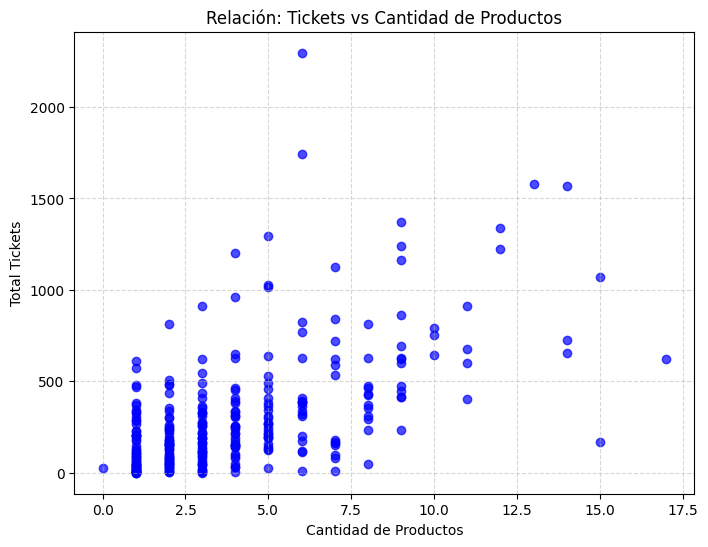

In [111]:
# --- Preparar dataset ---
df = tabla_unificada.copy()  # por si trabajamos sobre el original

# Calcular total de tickets sumando por a√±o
cols_tickets = [c for c in df.columns if "Cantidad_Tickets" in c]
df["Total_Tickets"] = df[cols_tickets].sum(axis=1)

# Evitar divisi√≥n por cero en PCs
df["Cantidad_PC"] = df["Cantidad_PC"].fillna(0)
df["Tickets_por_PC"] = df.apply(
    lambda x: x["Total_Tickets"] / x["Cantidad_PC"] if x["Cantidad_PC"] > 0 else 0, axis=1
)

# --- Gr√°fico 1: Tickets vs Productos ---
plt.figure(figsize=(8,6))
plt.scatter(df["Cantidad_Productos"], df["Total_Tickets"], alpha=0.7, c="blue")
plt.title("Relaci√≥n: Tickets vs Cantidad de Productos")
plt.xlabel("Cantidad de Productos")
plt.ylabel("Total Tickets")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



## Scatterplot Tickets vs PCs

- Permite ver si los clientes con m√°s infraestructura generan m√°s soporte.

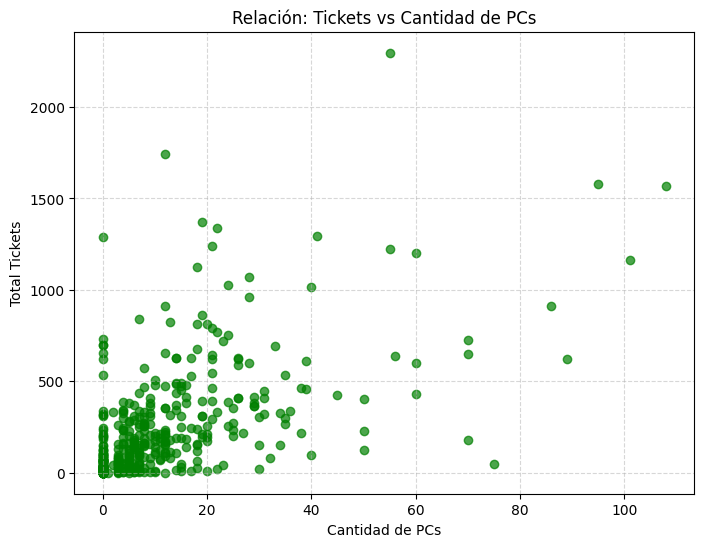

In [112]:
# --- Gr√°fico 2: Tickets vs PCs ---
plt.figure(figsize=(8,6))
plt.scatter(df["Cantidad_PC"], df["Total_Tickets"], alpha=0.7, c="green")
plt.title("Relaci√≥n: Tickets vs Cantidad de PCs")
plt.xlabel("Cantidad de PCs")
plt.ylabel("Total Tickets")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



## Histograma Tickets por PC

- Para ver c√≥mo se distribuye la carga relativa de soporte.

- Identifica clientes que son ‚Äúcaros‚Äù en soporte en relaci√≥n a sus PCs.

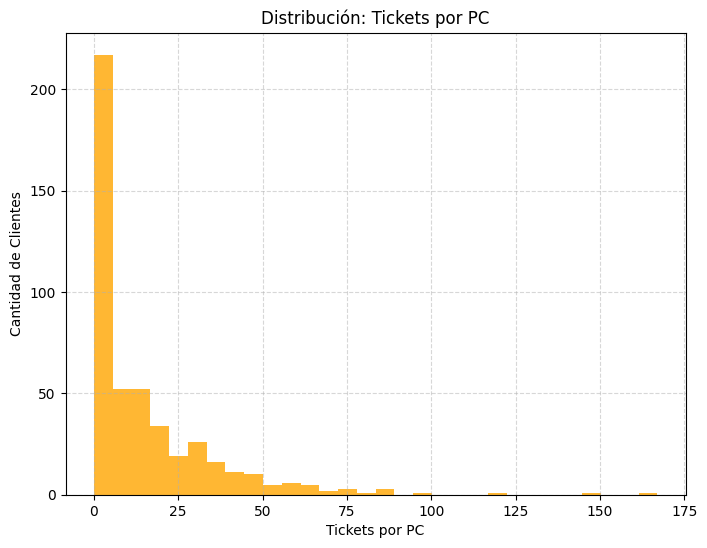

In [113]:
# --- Gr√°fico 3: Tickets por PC ---
plt.figure(figsize=(8,6))
plt.hist(df["Tickets_por_PC"], bins=30, color="orange", alpha=0.8)
plt.title("Distribuci√≥n: Tickets por PC")
plt.xlabel("Tickets por PC")
plt.ylabel("Cantidad de Clientes")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

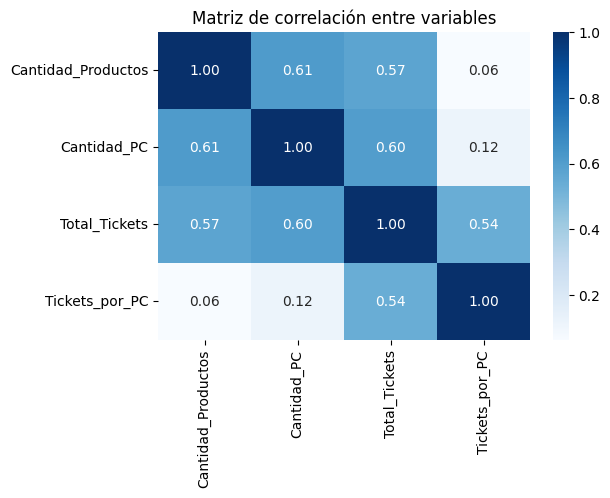

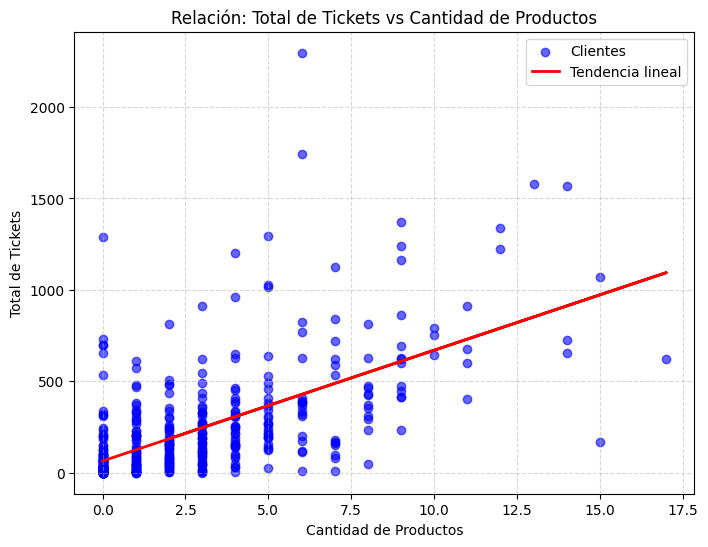

üìä Regresi√≥n Total de Tickets ~ Cantidad de Productos
  Pendiente: 60.577
  Intercepto: 64.214
  R¬≤: 0.397



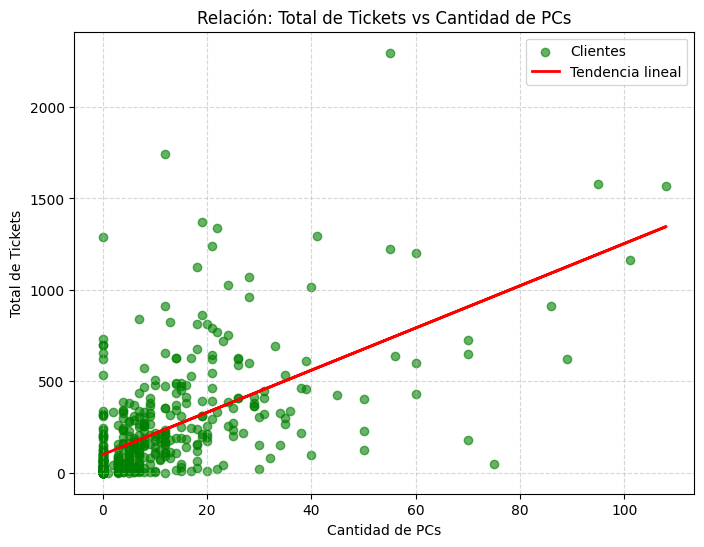

üìä Regresi√≥n Total de Tickets ~ Cantidad de PCs
  Pendiente: 11.552
  Intercepto: 98.604
  R¬≤: 0.365



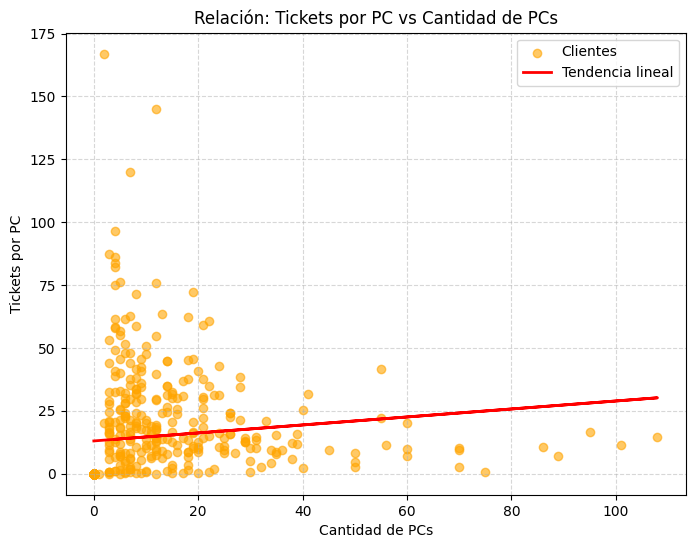

üìä Regresi√≥n Tickets por PC ~ Cantidad de PCs
  Pendiente: 0.159
  Intercepto: 13.040
  R¬≤: 0.014



In [115]:
from sklearn.linear_model import LinearRegression


# Calcular total de tickets sumando por a√±o
cols_tickets = [c for c in df.columns if "Cantidad_Tickets" in c]
df["Total_Tickets"] = df[cols_tickets].sum(axis=1)

# Evitar divisi√≥n por cero en PCs
df["Cantidad_PC"] = df["Cantidad_PC"].fillna(0)
df["Tickets_por_PC"] = df.apply(
    lambda x: x["Total_Tickets"] / x["Cantidad_PC"] if x["Cantidad_PC"] > 0 else 0, axis=1
)

# --- Matriz de correlaci√≥n ---
variables = ["Cantidad_Productos", "Cantidad_PC", "Total_Tickets", "Tickets_por_PC"]
corr = df[variables].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de correlaci√≥n entre variables")
plt.show()

# --- Funci√≥n para scatter + regresi√≥n lineal ---
def scatter_reg(x, y, xlabel, ylabel, color):
    X = df[[x]].fillna(0).values
    Y = df[y].fillna(0).values
    
    # Ajustar modelo lineal
    model = LinearRegression()
    model.fit(X, Y)
    y_pred = model.predict(X)
    
    # Gr√°fico
    plt.figure(figsize=(8,6))
    plt.scatter(X, Y, alpha=0.6, c=color, label="Clientes")
    plt.plot(X, y_pred, color="red", linewidth=2, label="Tendencia lineal")
    plt.title(f"Relaci√≥n: {ylabel} vs {xlabel}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.show()
    
    # Coeficientes
    print(f"üìä Regresi√≥n {ylabel} ~ {xlabel}")
    print(f"  Pendiente: {model.coef_[0]:.3f}")
    print(f"  Intercepto: {model.intercept_:.3f}")
    print(f"  R¬≤: {model.score(X, Y):.3f}\n")

# --- Gr√°ficos con regresi√≥n ---
scatter_reg("Cantidad_Productos", "Total_Tickets", "Cantidad de Productos", "Total de Tickets", "blue")
scatter_reg("Cantidad_PC", "Total_Tickets", "Cantidad de PCs", "Total de Tickets", "green")
scatter_reg("Cantidad_PC", "Tickets_por_PC", "Cantidad de PCs", "Tickets por PC", "orange")

In [22]:
tabla_unificada.head(-2)

Nombre de Cuenta  Cantidad_Productos  Cantidad_PC  \
0                      121                 NaN          NaN   
1       121 . Customertech                 NaN          NaN   
2    121 Prueba Desestimar                 NaN          NaN   
3        AB CONSTRUCCIONES                17.0         89.0   
4             ACEROS DEFER                 9.0         16.0   
..                     ...                 ...          ...   
459               WUIGNIER                 3.0         14.0   
460                 Workok                 NaN          NaN   
461                  YAPUR                14.0        108.0   
462         ZC HERRAMENTAL                 9.0         14.0   
463              bricoshop                 NaN          NaN   

    Fecha_Inicio_PalJetERP  Cantidad_Tickets 2021  Cantidad_Tickets 2022  \
0                      NaN                    1.0                    0.0   
1                      NaN                   10.0                    2.0   
2                      NaN                    0.0                    0.0   
3               28/02/2013                   82.0                  141.0   
4               02/09/2019                  106.0                  115.0   
..                     ...                    ...                    ...   
459             01/09/2014                    8.0                    2.0   
460                    NaN                   39.0                   41.0   
461             01/03/2009                  252.0                  331.0   
462             05/01/2021                  167.0                   47.0   
463                    NaN                    0.0                    0.0   

     Cantidad_Tickets 2023  Cantidad_Tickets 2024  Cantidad_Tickets 2025  \
0                      0.0                    0.0                    0.0   
1                      1.0                    3.0                    1.0   
2                      1.0                    0.0                    0.0   
3                    123.0                  141.0                  137.0   
4                    103.0                   55.0                   35.0   
..                     ...                    ...                    ...   
459                    6.0                    1.0                    0.0   
460                   39.0                   26.0                    5.0   
461                  402.0                  372.0                  211.0   
462                  184.0                  131.0                  100.0   
463                    0.0                    1.0                    0.0   

     TOTAL_Tickets  
0                1  
1               17  
2                1  
3              624  
4              414  
..             ...  
459             17  
460            150  
461           1568  
462            629  
463              1  

[464 rows x 10 columns]

## VERLO COMPLETO
# 3. Limpieza y preparaci√≥n de los datos


In [ ]:
# Eliminar duplicados
df = df.drop_duplicates()

# Manejo de valores nulos
df = df.fillna(0)

# Crear m√©tricas derivadas
df["Solicitudes_Total"] = df["Tickets"] + df["Llamadas"]
df["Solicitudes_por_Licencia"] = df["Solicitudes_Total"] / df["Licencias"].replace(0, np.nan)
df["Productos_por_A√±o"] = df["Productos"] / df["Antiguedad_Anios"].replace(0, np.nan)



In [ ]:
# =====================================================
# 4. AN√ÅLISIS EXPLORATORIO
# =====================================================

# Estad√≠sticas descriptivas
print("\nEstad√≠sticas generales:")
display(df.describe())

# Distribuci√≥n de clientes por licencias
plt.figure(figsize=(8,5))
sns.histplot(df["Licencias"], bins=20, kde=True)
plt.title("Distribuci√≥n de Licencias por Cliente")
plt.show()

# Relaci√≥n Licencias vs. Tickets
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Licencias", y="Tickets")
plt.title("Licencias vs Tickets")
plt.show()

# Pareto: clientes que m√°s solicitudes generan
df_pareto = df.sort_values("Solicitudes_Total", ascending=False)
df_pareto["% Acumulado"] = df_pareto["Solicitudes_Total"].cumsum() / df_pareto["Solicitudes_Total"].sum() * 100

fig = px.bar(df_pareto, x="Cliente", y="Solicitudes_Total", title="Pareto de Solicitudes por Cliente")
fig.add_scatter(x=df_pareto["Cliente"], y=df_pareto["% Acumulado"], mode="lines+markers", name="% Acumulado")
fig.show()



In [ ]:
# =====================================================
# 5. SEGMENTACI√ìN DE CLIENTES (CLUSTERING)
# =====================================================

# Seleccionar variables para el modelo
vars_modelo = ["Licencias", "Productos", "Solicitudes_Total", "Antiguedad_Anios"]
X = df[vars_modelo]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualizaci√≥n de clusters
fig = px.scatter_3d(df, x="Licencias", y="Productos", z="Solicitudes_Total",
                    color="Cluster", hover_data=["Cliente"])
fig.show()



In [ ]:
# =====================================================
# 6. INSIGHTS INICIALES
# =====================================================
# Agrupar por cluster para ver promedios
insights = df.groupby("Cluster")[vars_modelo].mean()
print("\nPromedios por cluster:")
display(insights)

# Guardar resultados
df.to_csv("clientes_segmentados.csv", index=False)
print("\nArchivo 'clientes_segmentados.csv' generado.")